<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 181.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 81.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 157.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 145.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 131.4 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [5]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head(40)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [6]:
critical_cols = ['Employment', 'JobSat', 'RemoteWork']
missing_counts = df[critical_cols].isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

print("Missing Values:\n", missing_counts)
print("\nMissing Percentage:\n", missing_percent)

Missing Values:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing Percentage:
 Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64


In [7]:
df = df.dropna(subset=['Employment'])

In [8]:
# Convert to float if not already
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Fill missing with median
job_sat_median = df['JobSat'].median()
df['JobSat'] = df['JobSat'].fillna(job_sat_median)

In [9]:
remote_mode = df['RemoteWork'].mode()
if not remote_mode.empty:
    df['RemoteWork'] = df['RemoteWork'].fillna(remote_mode.iloc[0])
else:
    print("No mode found in RemoteWork — all values might be NaN.")

In [58]:
print(df[critical_cols].isnull().sum())

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [10]:
# Replace known string values
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# convert all to float
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
bins = [0, 5, 10, 20, float('inf')]
labels = ['0–5 yrs', '5–10 yrs', '10–20 yrs', '>20 yrs']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

In [11]:
median_jobs_sat = df.groupby('ExperienceRange', observed=False)['JobSat'].median().reset_index()
print(median_jobs_sat)

  ExperienceRange  JobSat
0         0–5 yrs     7.0
1        5–10 yrs     7.0
2       10–20 yrs     7.0
3         >20 yrs     7.0


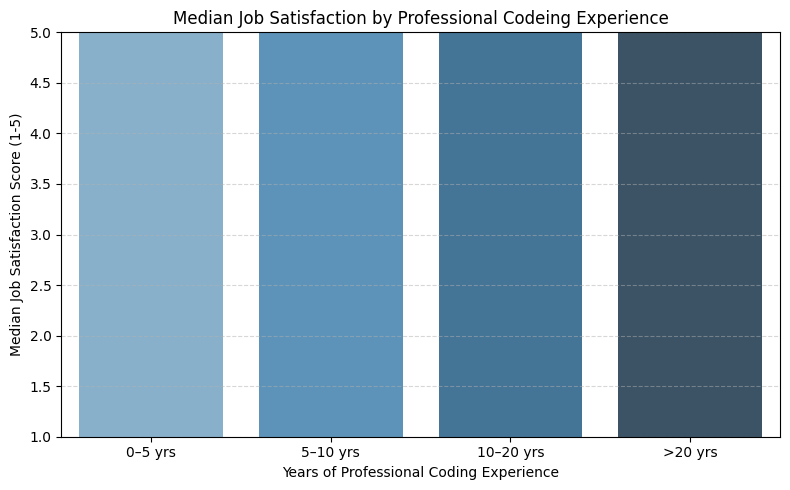

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=median_jobs_sat, x='ExperienceRange', y='JobSat',  hue='ExperienceRange', palette='Blues_d', legend=False    )
plt.title('Median Job Satisfaction by Professional Codeing Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score (1-5)')
plt.ylim(1, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


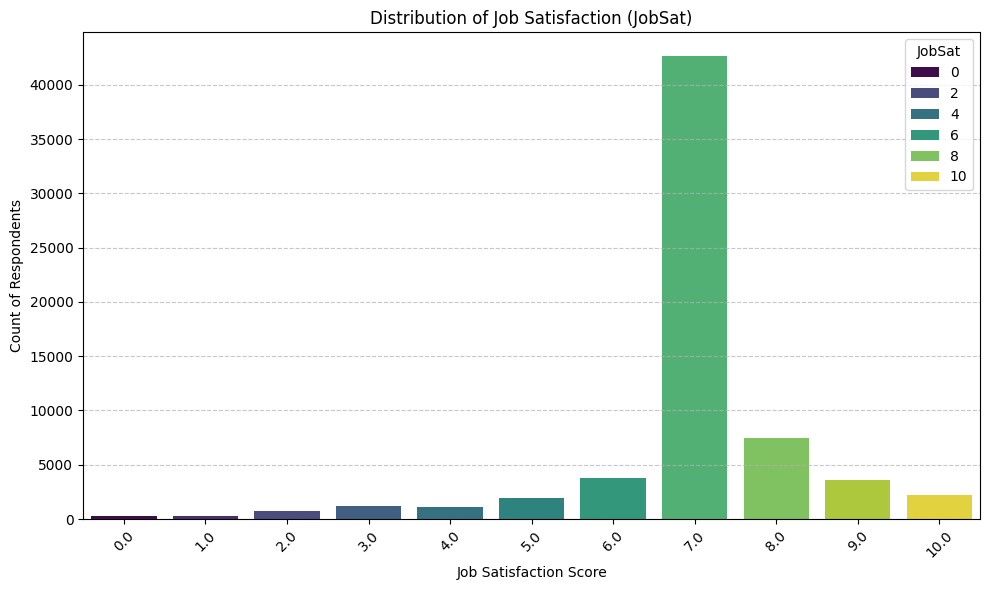

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat', hue='JobSat', palette='viridis', order=sorted(df['JobSat'].dropna().unique()))
plt.title('Distribution of Job Satisfaction (JobSat)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [14]:
#extract primary employment type
df['PrimaryEmployment'] = df['Employment'].str.split(' and ').str[0]

#extract employment type keyword for analysis
import re

def extract_employment_type(text):
    if pd.isna(text):
        return 'Unknown'
    match = re.search(r'(full-time|part-time|contract|self-employed|freelance|intern)', text, re.I)
    return match.group(0).lower() if match else 'other'
df['EmploymentType'] = df['PrimaryEmployment'].apply(extract_employment_type)

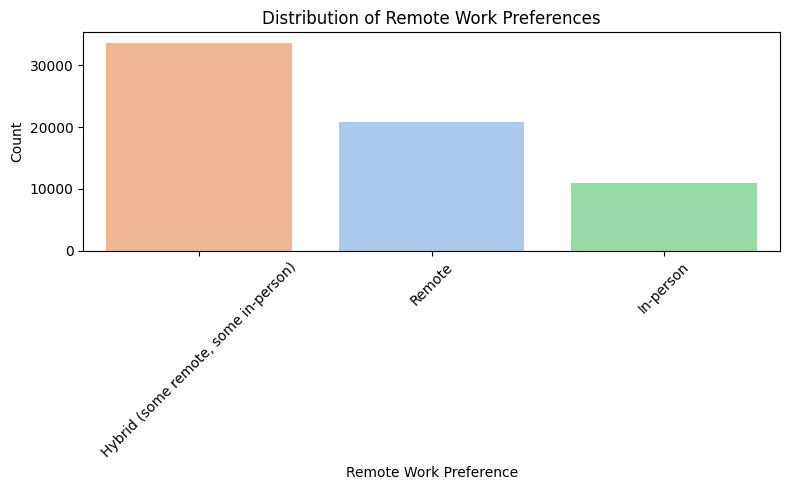

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork',  hue='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='pastel')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [16]:
#drop missing values
df_lang = df.dropna(subset=['LanguageHaveWorkedWith','Country']).copy()

#Expand rows: split language and explode
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('LanguageHaveWorkedWith')

#Remove extra space
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()

In [17]:
lang_counts = df_exploded.groupby(['Country','LanguageHaveWorkedWith']).size().reset_index(name='Count')

In [18]:
# Pivot for heatmap (countries as rows, languages as columns)
lang_pivot = lang_counts.pivot(index='Country', columns='LanguageHaveWorkedWith', values='Count').fillna(0)

# Optionally, normalize by row (percent of each country)
lang_pivot_percent = lang_pivot.div(lang_pivot.sum(axis=1), axis=0) * 100

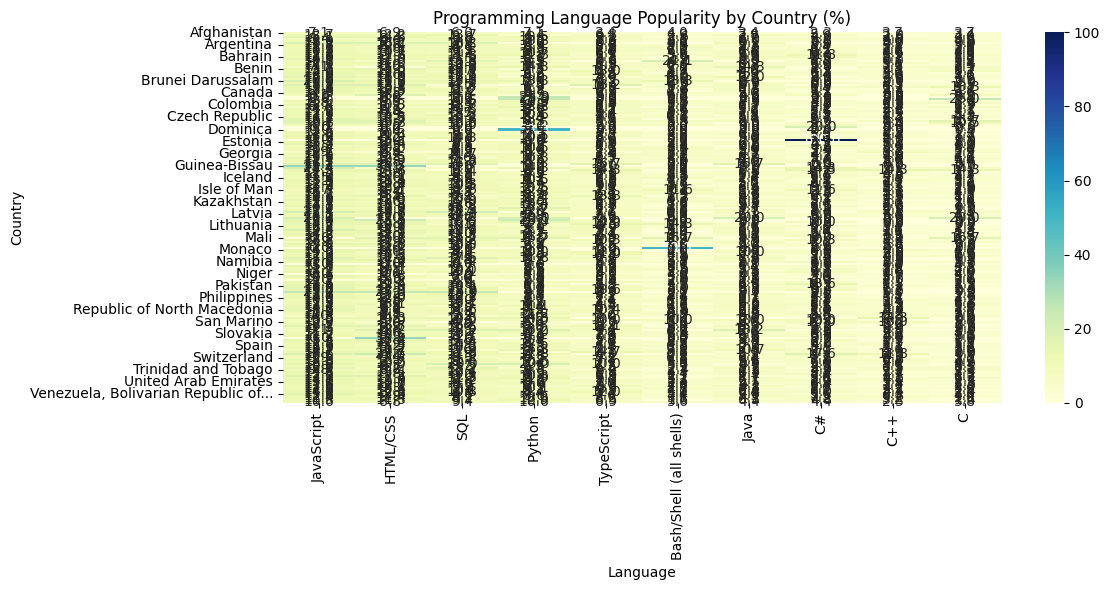

In [19]:
#keep only top N languages globally
top_languages = df_exploded['LanguageHaveWorkedWith'].value_counts().head(10).index.tolist()
lang_pivot_filtered = lang_pivot_percent[top_languages]

plt.figure(figsize=(12, 6))
sns.heatmap(lang_pivot_filtered, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Programming Language Popularity by Country (%)')
plt.xlabel('Language')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [20]:
# Ensure both columns are numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in either column
scatter_df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])


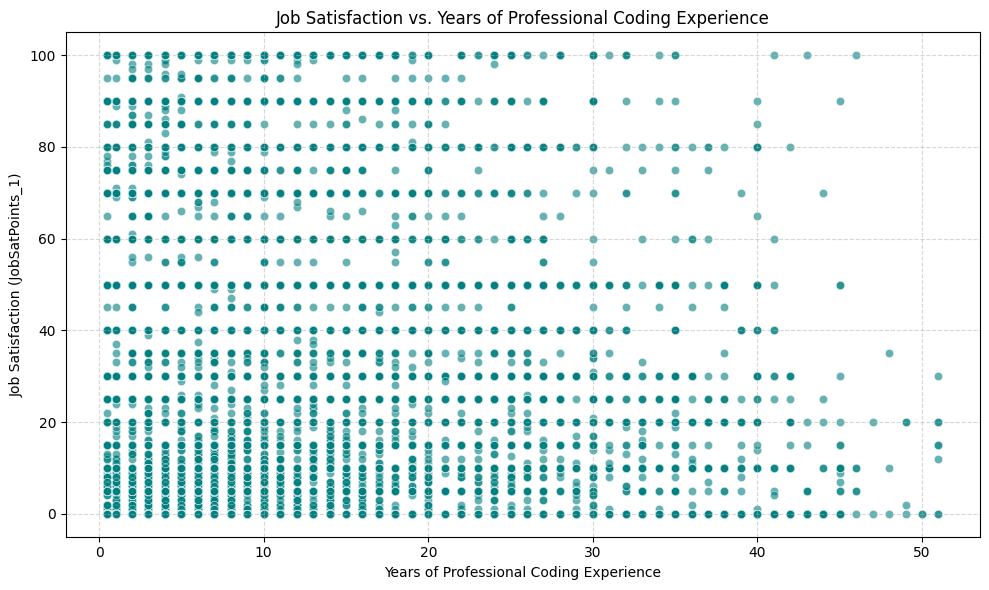

In [21]:
plt.figure(figsize=(10 ,6))
sns.scatterplot(data=scatter_df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.6, color='teal')
plt.title('Job Satisfaction vs. Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.grid(True, linestyle='--',  alpha=0.5)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [22]:
df_clean = df.dropna(subset=['EdLevel', 'Employment']).copy()

In [23]:
edu_emp_crosstab = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'])
print("Raw Count Table: \n", edu_emp_crosstab)

Raw Count Table: 
 Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)     

In [25]:
#Normalize to show row-wise percentage
edu_emp_percent = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'], normalize='index') * 100
print("Row-Normalized Table (%):\n", edu_emp_percent.round(1))

Row-Normalized Table (%):
 Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                59.1   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                       67.4   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    70.8   
Primary/elementary school                                          14.0   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     69.8   
Secondary school (e.g. American high school, Ge...                 25.2   
Some college/university study without earning a...                 46.8   
Something else                                                     40.5   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., et

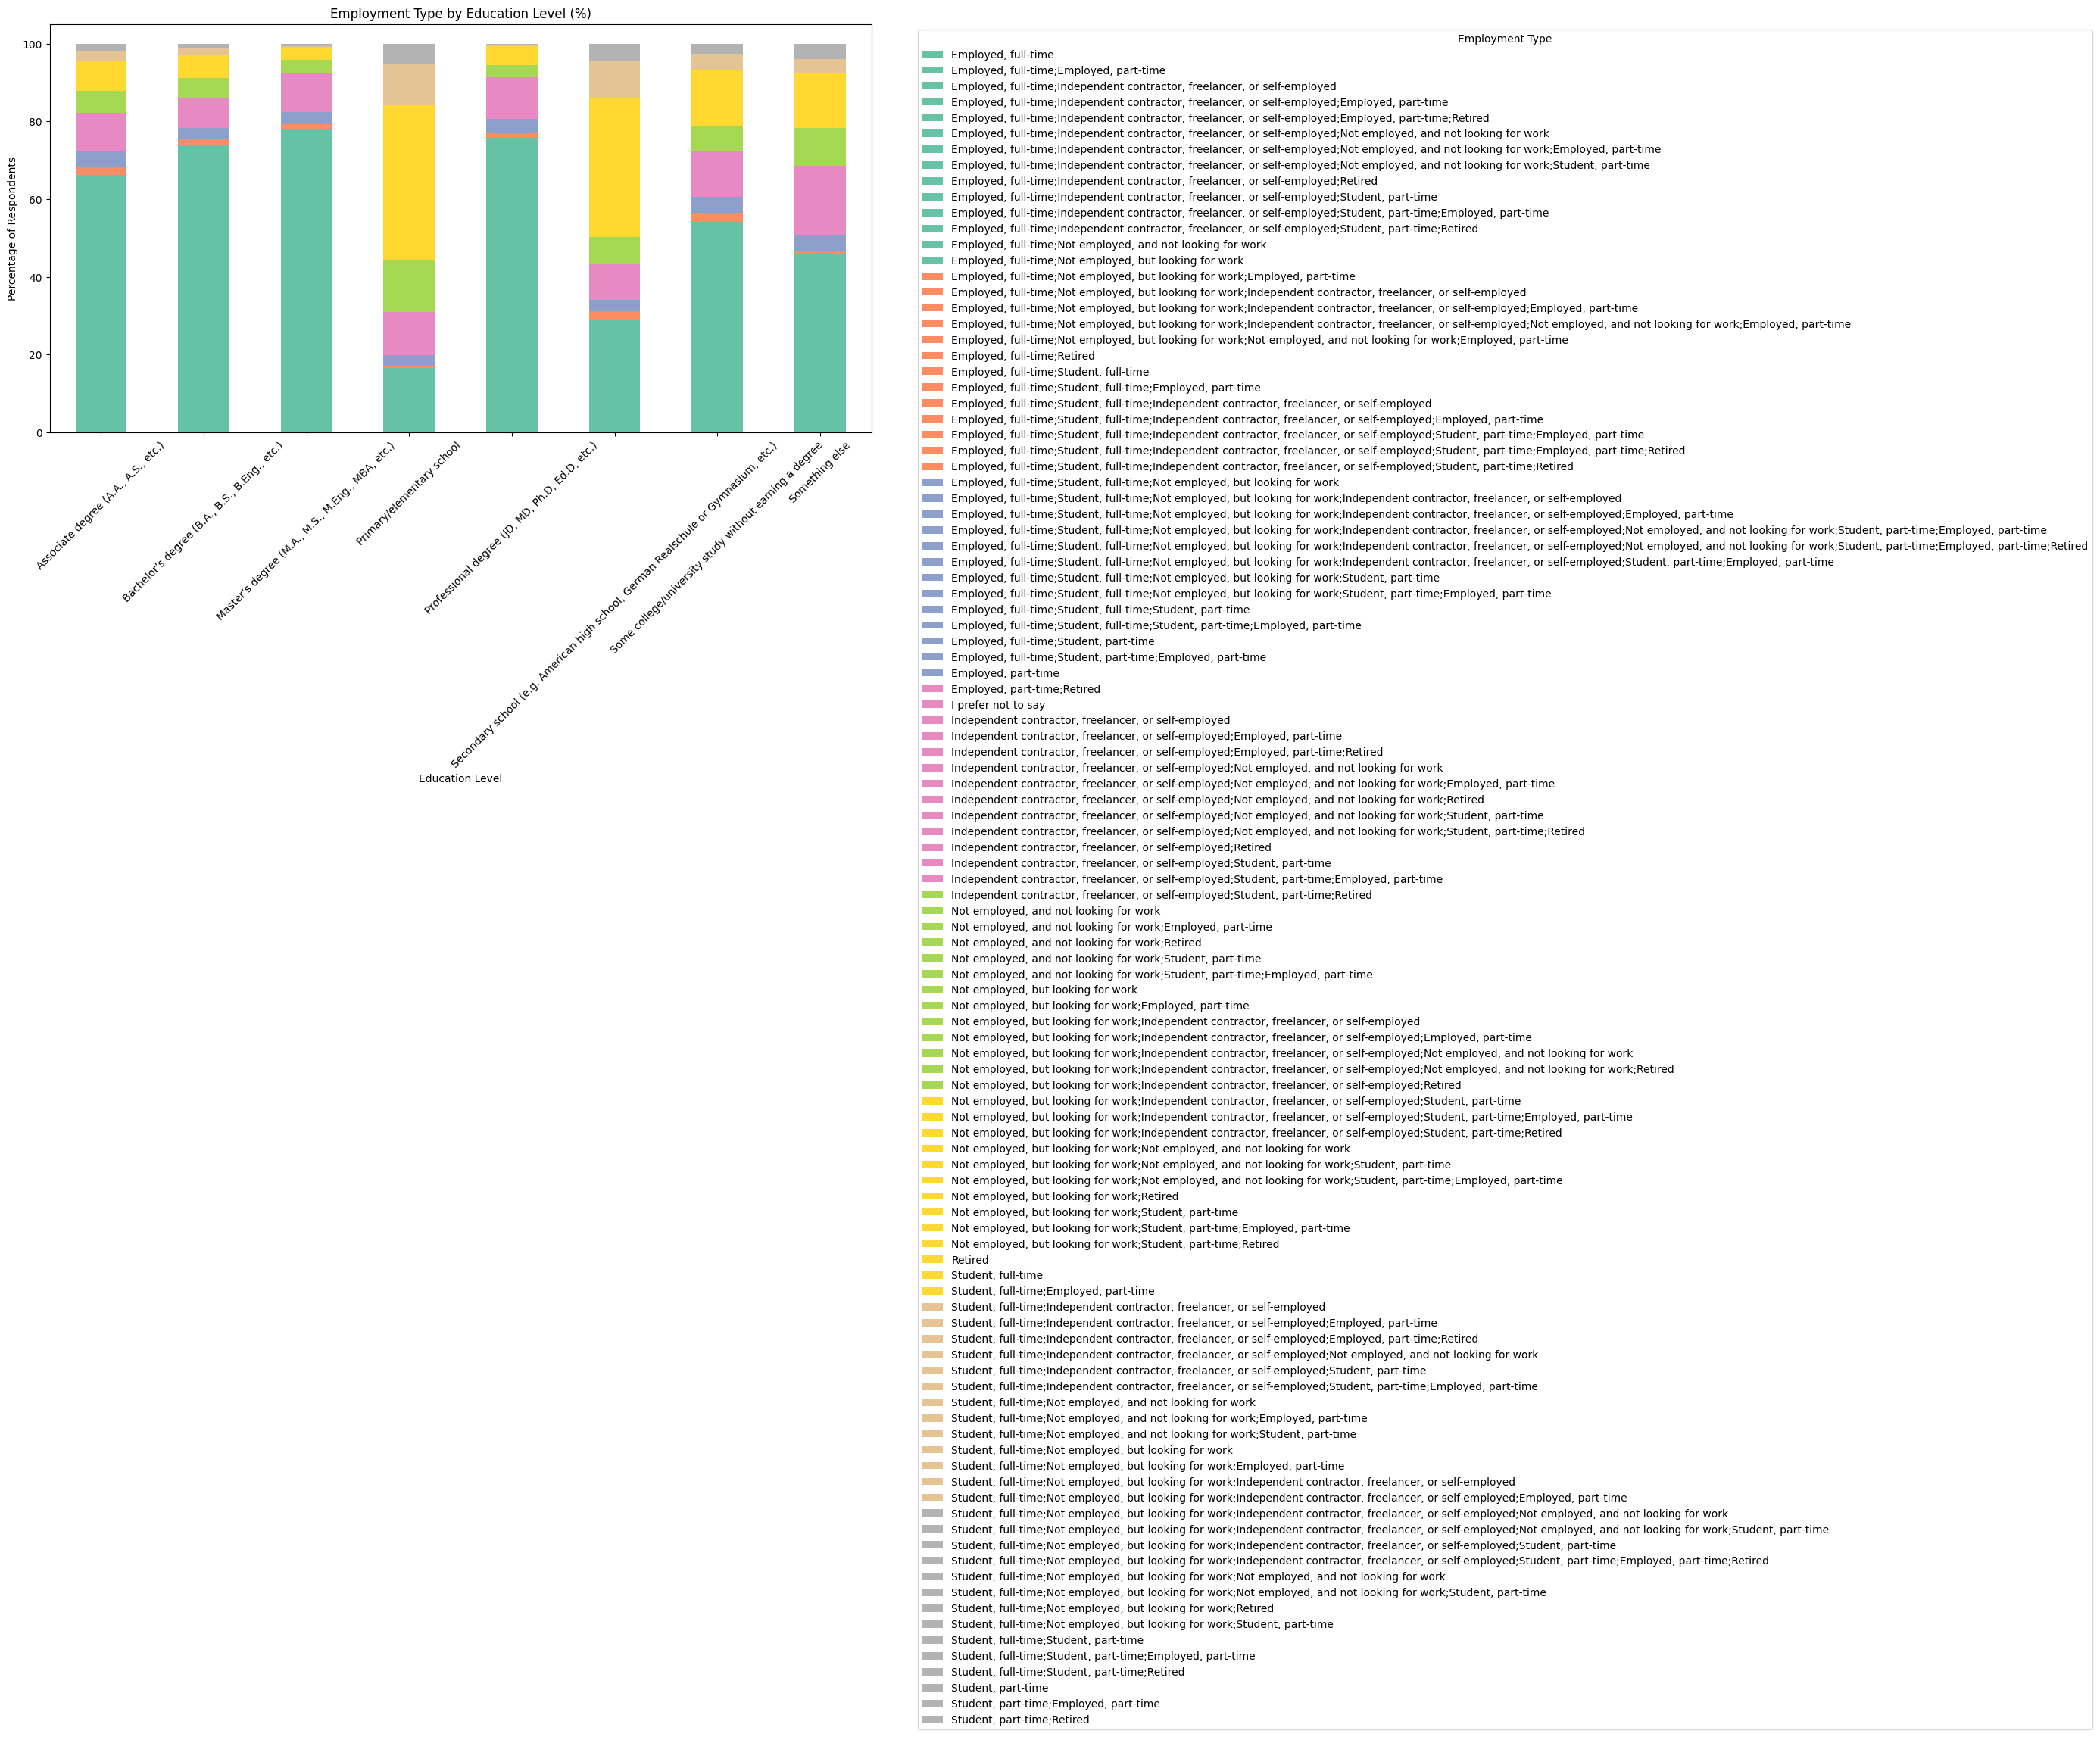

In [30]:
ax = edu_emp_percent.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')
plt.title('Employment Type by Education Level (%)')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipykernel_301/3798257345.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


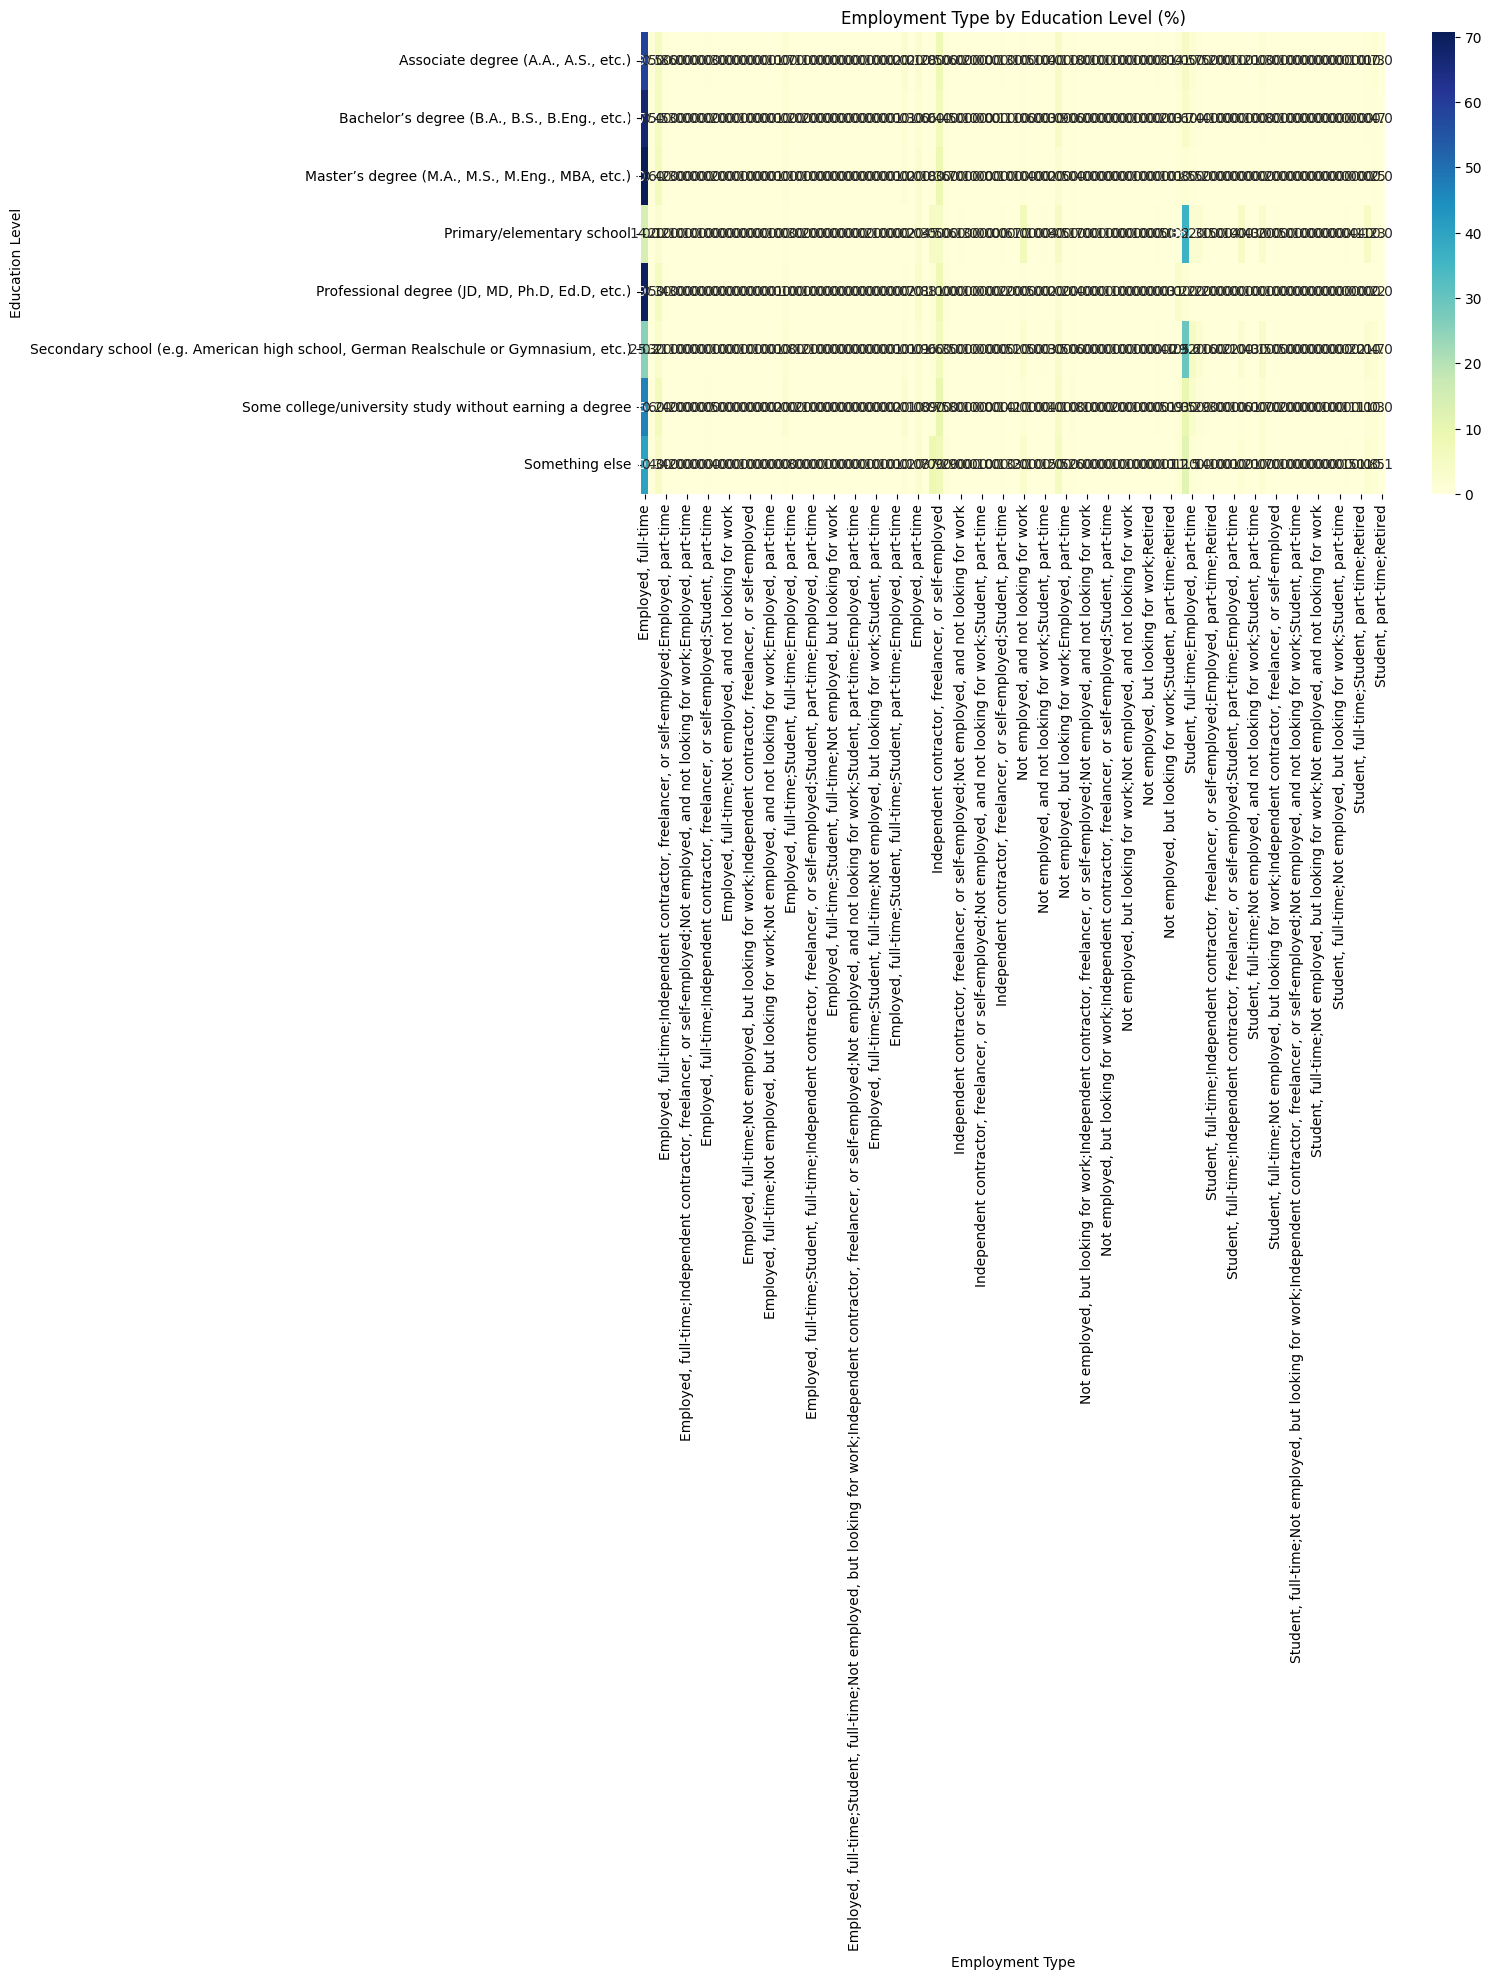

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(edu_emp_percent, annot=True, fmt=".1f", cmap='YlGnBu')

plt.title('Employment Type by Education Level (%)')
plt.ylabel('Education Level')
plt.xlabel('Employment Type')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [32]:
df.to_csv('modified_dataset.csv', index=False)

In [ ]:
!pip install openpyxl

In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
